## Project 1 report

### Yuning Zhang (470175521)

Please follow the instructions carefully:
- This project is based on Cifar-10 dataset. The basic loading operations are added already. Please do not use other dataset.
- Remove the corresponding `e.g.` and fill in all the blanks in this file, including some codes in Part 1, your choices for Part 2, your task for Part 3, and the analyses for your choices, specification of your computer, etc.
- Please do not change the format of this report.
- In your analyses, you can add math functions and graphs.
- Please make clear comments and references for any codes written by yourself or copied from other sources.

### Part 0: Prepare for Colab

The default colab uses CPU, you can add GPU resources in Runtime->Change runtime type->dropdown, select GPU->save

**Note: the following code is written for cpu, you need to allocate data and network to GPU on your own if you want to utilize GPU devices.**

### Part 1: Baseline model
You need to run this model successfully to get the marks. You should finish the codes that are used to split the training dataset into training set (45000 images) and validation set (5000 images) and draw the loss curve for training loss and validation loss. 

### 1.1 prepare data

In [ ]:
# useful packages
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn


In [ ]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 1.2 split the training data into training and validation
In most of the cases, you are given the test set, so you need to prepare some validation data to evaluate your model during training stage. You need to make a validation dataset that contains 5000 training images, and the rest 45000 images are used as the new training set.

In [ ]:
# Your split codes here.
# You need to random select the 5000 validation images 
import numpy as np

train_set, val_set = torch.utils.data.random_split(trainset, [45000, 5000])
# Use the random_split function, select 5000 images from the trainset.


trainingloader = torch.utils.data.DataLoader(train_set, batch_size=4,shuffle=True, num_workers=2)
validationloader =torch.utils.data.DataLoader(val_set, batch_size=4,shuffle=True, num_workers=2)


# besides, you can also make modifications for faster training 
# by selecting a subset of the original dataset.

### 1.3 Define a Baseline Convolution Neural Network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(self.relu1(self.conv1(x)))
        x = self.pool(self.relu2(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 1.4 Define a Loss function and optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


### 1.5 Train the network

In [ ]:
# create the array of result
training_loss_data = []
validation_loss_data = []
validation_accuracy = []
training_accuracy = []
training_running_loss = 0.0
validation_loss = 0.0

for epoch in range(2):  # loop over the dataset multiple times

    
    for i, data in enumerate(trainingloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
   
        dataiter = iter(validationloader)#set the input data as validationset data, according to the Reference 2
        inputs2, labels = dataiter.next()
        outputs = net(inputs2)
        loss2 = criterion(outputs, labels)
        # print statistics
        training_running_loss += loss.item()#add up the total training_loss
        validation_loss += loss2.item()#add up the total validation_loss
        if i % 2000 == 1999:#calculate the trainning loss and validation loss for the minibatch
            training_loss_data.append(training_running_loss / 2000)
            validation_loss_data.append(validation_loss / 2000)
            print('[%d, %5d] training loss: %.3f' %(epoch + 1, i + 1, training_running_loss / 2000)) 
            print('[%d, %5d] validation loss: %.3f' %(epoch + 1, i + 1, validation_loss / 2000)) 
            training_running_loss = 0.0 
            validation_loss = 0.0
    
            
            training_correct = 0
            training_total = 0
            with torch.no_grad():
                for data in trainingloader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    training_total += labels.size(0)
                    training_correct += (predicted == labels).sum().item()
            print('Accuracy of the network on the training images: %d %%' % (100 * training_correct / training_total))
            training_accuracy.append(100 * training_correct / training_total)

            
            validation_correct = 0
            validation_total = 0
            with torch.no_grad():
                for data in validationloader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    validation_total += labels.size(0)
                    validation_correct += (predicted == labels).sum().item()
            print('Accuracy of the network on the 5000 validation images: %d %%' % (100 * validation_correct / validation_total))
            validation_accuracy.append(100 * validation_correct / validation_total)
            #calculate the trainning accuracy and validation accuracy for the minibatch
    training_running_loss = 0.0
    validation_loss = 0.0
print('Finished Training')

[1,  2000] training loss: 2.268
[1,  2000] validation loss: 2.267
Accuracy of the network on the training images: 22 %
Accuracy of the network on the 5000 validation images: 22 %
[1,  4000] training loss: 2.041
[1,  4000] validation loss: 2.026
Accuracy of the network on the training images: 26 %
Accuracy of the network on the 5000 validation images: 26 %
[1,  6000] training loss: 1.945
[1,  6000] validation loss: 1.925
Accuracy of the network on the training images: 31 %
Accuracy of the network on the 5000 validation images: 32 %
[1,  8000] training loss: 1.764
[1,  8000] validation loss: 1.762
Accuracy of the network on the training images: 37 %
Accuracy of the network on the 5000 validation images: 37 %
[1, 10000] training loss: 1.673
[1, 10000] validation loss: 1.629
Accuracy of the network on the training images: 43 %
Accuracy of the network on the 5000 validation images: 44 %
[2,  2000] training loss: 1.529
[2,  2000] validation loss: 1.535
Accuracy of the network on the training

### 1.6 visualize the loss and accuracy
Using the loss of both training data and validation data to evaluate the model. You may need to change some of the codes in 1.5 in order to save the loss into different lists.

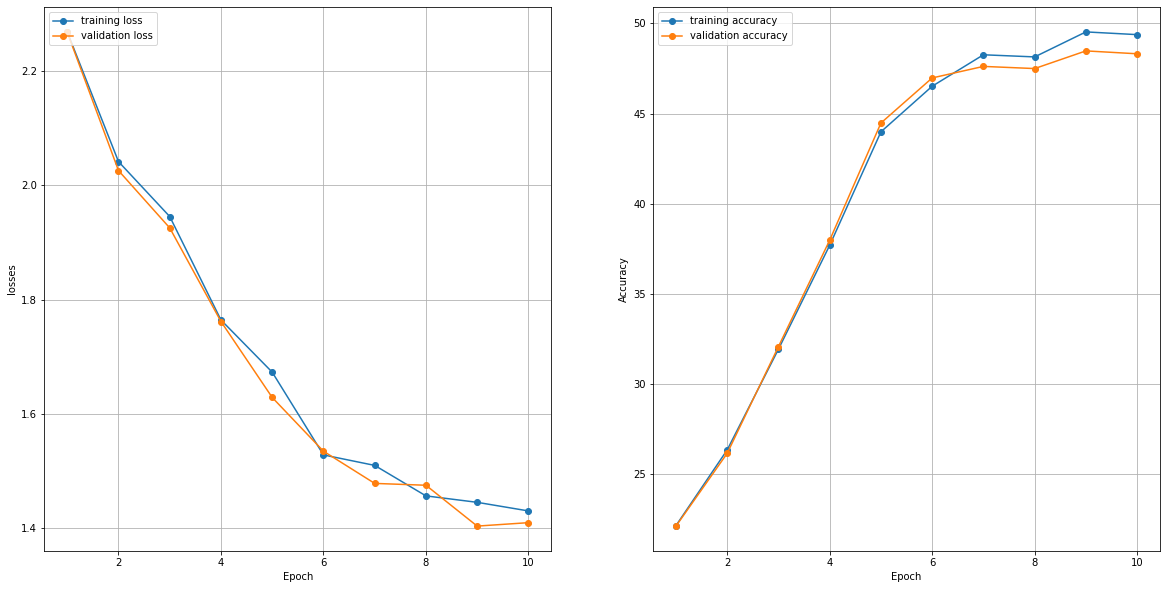

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show the loss
#plot the first curve for loss and mine batch set in 2 epoch.
plt.figure
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

tr_loss = np.arange(len(training_loss_data))
val_loss = np.arange(len(validation_loss_data))

plt.plot(tr_loss+1, training_loss_data, 'o-')
plt.plot(val_loss+1, validation_loss_data, 'o-')

plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('losses')
plt.grid()

#plot the second curve for accuracy and mini batch set in 2 epoch.
plt.subplot(1,2,2)

training_acc = np.arange(len(training_accuracy))
val_acc = np.arange(len(validation_accuracy))

plt.plot(training_acc+1, training_accuracy, 'o-')
plt.plot(val_acc+1, validation_accuracy, 'o-')

plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()

### 1.7 Eval the trained network

In [ ]:
def eval_net(net, testloader, validationloader):

    validation_correct = 0
    validation_total = 0
    with torch.no_grad():
        for data in validationloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            validation_total += labels.size(0)
            validation_correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 5000 validation images: %d %%' % (100 * validation_correct / validation_total))
    validation_accuracy.append(100 * validation_correct / validation_total)

    testing_correct = 0
    testing_total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            testing_total += labels.size(0)
            testing_correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * testing_correct / testing_total))
    test_accuracy.append(100 * testing_correct / testing_total)

eval_net(net, testloader, validationloader)

Accuracy of the network on the 5000 validation images: 53 %
Accuracy of the network on the 10000 test images: 53 %


### Part 2: Hyperparameters Selection
Following the instruction file, you need to make choices for each hyperparameters:

1. Batch size: 8
2. Base learning rate: 0.0005
3. Number of epochs: 8

**Question**: Why do you make such choices? Use some figures, math equations, codes and printout to make analysis.

**Answer**: In my experiment, the best accurcy is 61%. If learning rate is 0.005 or 0.00001 or 0.00005, these choises are not ideal, they are either too large or too small. And 0.0005 is the most stable of them all. As the figure showing, when learning rate is 0.005, the curve of loss is not stable, the model can not convergence. If the epoch is 16, the figure show most of curve is overfitting, and the batch_size have the best performance is 8 according to the whole curve.

In [ ]:
import matplotlib.pyplot as plt
import torch.optim as optim
# the parameters
batch_sizes = [2,4,8]
lrs = [0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
epochs = [1, 2, 4, 8, 16]

# the function of plotting the graph
def plotting(training_loss_data, validation_loss_data, validation_accuracy, test_accuracy):
    plt.figure(figsize=(20,10))
    for i in range(1,7):
        
        plt.subplot(2,3,i)

        tr_loss = np.arange(len(training_loss_data[i-1]))
        val_loss = np.arange(len(validation_loss_data[i-1]))
        test_acc = np.arange(len(test_accuracy[i-1]))
        val_acc = np.arange(len(validation_accuracy[i-1]))

        plt.plot(tr_loss+1, training_loss_data[i-1], 'ro-')
        plt.plot(val_loss+1, validation_loss_data[i-1], 'go-')
        
        plt.yticks(np.arange(0, 2.5, 0.2))
        plt.legend(['training loss', 'validation loss'], loc='upper left')
        plt.xlabel('Epoch')
        plt.ylabel('losses')

        plt.twinx()

        plt.plot(test_acc+1, test_accuracy[i-1], 'yx-')
        plt.plot(val_acc+1, validation_accuracy[i-1], 'bx-')
        
        plt.yticks(np.arange(0, 100, 10))
        plt.legend(['test accuracy', 'validation accuracy'], loc='upper right')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')

        plt.grid()

# the training function
def training(lrs, training_loss_data,validation_loss_data,validation_accuracy,test_accuracy):
    for j in range(len(lrs)):

        net = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(net.parameters(), lr=lrs[j], momentum=0.9)

        new_training_loss_data = []
        new_validation_loss_data = []
        new_validation_accuracy = []
        new_test_accuracy = []

    
        for epoch in range(1, 17):
            training_running_loss = 0.0
            for i, data in enumerate(trainingloader, 0):
                # get the inputs
                inputs, labels = data
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                # print statistics
                training_running_loss += loss.item()
            print('epoch: %d, training loss: %.3f' %(epoch, training_running_loss / len(trainingloader)))
            new_training_loss_data.append(training_running_loss/len(trainingloader))
            training_running_loss = 0.0

            validation_running_loss = 0.0
            for i, data in enumerate(validationloader, 0):
                # get the inputs
                inputs, labels = data
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward 
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                # print statistics
                validation_running_loss += loss.item()
            print('epoch: %d, validation loss: %.3f' %(epoch, validation_running_loss / len(validationloader)))
            new_validation_loss_data.append(validation_running_loss / len(validationloader))
            validation_running_loss = 0.0

            validation_correct = 0
            validation_total = 0
            with torch.no_grad():
                for data in validationloader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    validation_total += labels.size(0)
                    validation_correct += (predicted == labels).sum().item()
            print('Accuracy of the network on the 5000 validation images: %d %%' % (100 * validation_correct / validation_total))
            new_validation_accuracy.append(100 * validation_correct / validation_total)

            testing_correct = 0
            testing_total = 0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    testing_total += labels.size(0)
                    testing_correct += (predicted == labels).sum().item()
            print('Accuracy of the network on the 10000 test images: %d %%' % (100 * testing_correct / testing_total))
            new_test_accuracy.append(100 * testing_correct / testing_total)


        training_loss_data.append(new_training_loss_data)
        validation_loss_data.append(new_validation_loss_data)
        validation_accuracy.append(new_validation_accuracy)
        test_accuracy.append(new_test_accuracy)
        print('learning rate = %0.5f' %(lrs[j]))
        print('Finished Training\n')

In [ ]:
# when batch size is 2
bs2_training_loss_data = []
bs2_validation_loss_data = []
bs2_validation_accuracy = []
bs2_test_accuracy = []
training(lrs, bs2_training_loss_data, bs2_validation_loss_data, bs2_validation_accuracy, bs2_test_accuracy)

epoch: 1, training loss: 2.055
epoch: 1, validation loss: 2.017
Accuracy of the network on the 5000 validation images: 25 %
Accuracy of the network on the 10000 test images: 25 %
epoch: 2, training loss: 2.007
epoch: 2, validation loss: 1.928
Accuracy of the network on the 5000 validation images: 27 %
Accuracy of the network on the 10000 test images: 28 %
epoch: 3, training loss: 1.975
epoch: 3, validation loss: 2.183
Accuracy of the network on the 5000 validation images: 21 %
Accuracy of the network on the 10000 test images: 21 %
epoch: 4, training loss: 2.031
epoch: 4, validation loss: 1.963
Accuracy of the network on the 5000 validation images: 24 %
Accuracy of the network on the 10000 test images: 25 %
epoch: 5, training loss: 2.002
epoch: 5, validation loss: 1.967
Accuracy of the network on the 5000 validation images: 25 %
Accuracy of the network on the 10000 test images: 26 %
epoch: 6, training loss: 1.994
epoch: 6, validation loss: 1.943
Accuracy of the network on the 5000 valid

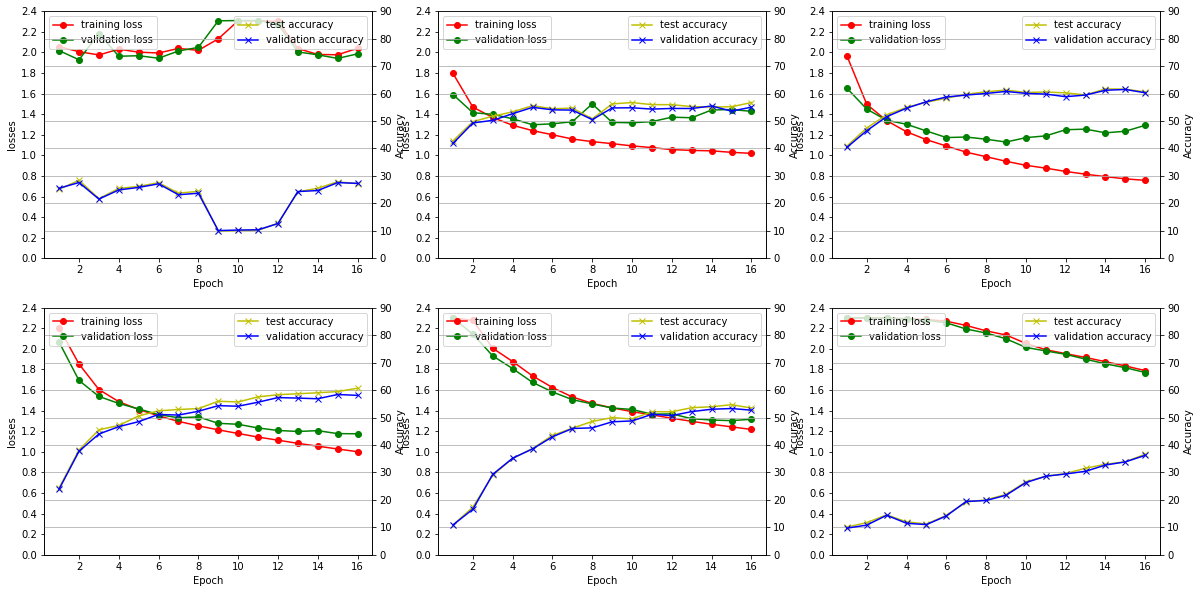

In [ ]:
plotting(bs2_training_loss_data, bs2_validation_loss_data, bs2_validation_accuracy, bs2_test_accuracy)

In [ ]:
# when batch size is 4
bs4_training_loss_data = []
bs4_validation_loss_data = []
bs4_validation_accuracy = []
bs4_test_accuracy = []
training(lrs, bs4_training_loss_data, bs4_validation_loss_data, bs4_validation_accuracy, bs4_test_accuracy)

epoch: 1, training loss: 1.888
epoch: 1, validation loss: 1.728
Accuracy of the network on the 5000 validation images: 36 %
Accuracy of the network on the 10000 test images: 37 %
epoch: 2, training loss: 1.710
epoch: 2, validation loss: 1.644
Accuracy of the network on the 5000 validation images: 40 %
Accuracy of the network on the 10000 test images: 40 %
epoch: 3, training loss: 1.675
epoch: 3, validation loss: 1.809
Accuracy of the network on the 5000 validation images: 34 %
Accuracy of the network on the 10000 test images: 32 %
epoch: 4, training loss: 1.669
epoch: 4, validation loss: 1.683
Accuracy of the network on the 5000 validation images: 40 %
Accuracy of the network on the 10000 test images: 40 %
epoch: 5, training loss: 1.647
epoch: 5, validation loss: 1.709
Accuracy of the network on the 5000 validation images: 39 %
Accuracy of the network on the 10000 test images: 41 %
epoch: 6, training loss: 1.650
epoch: 6, validation loss: 1.692
Accuracy of the network on the 5000 valid

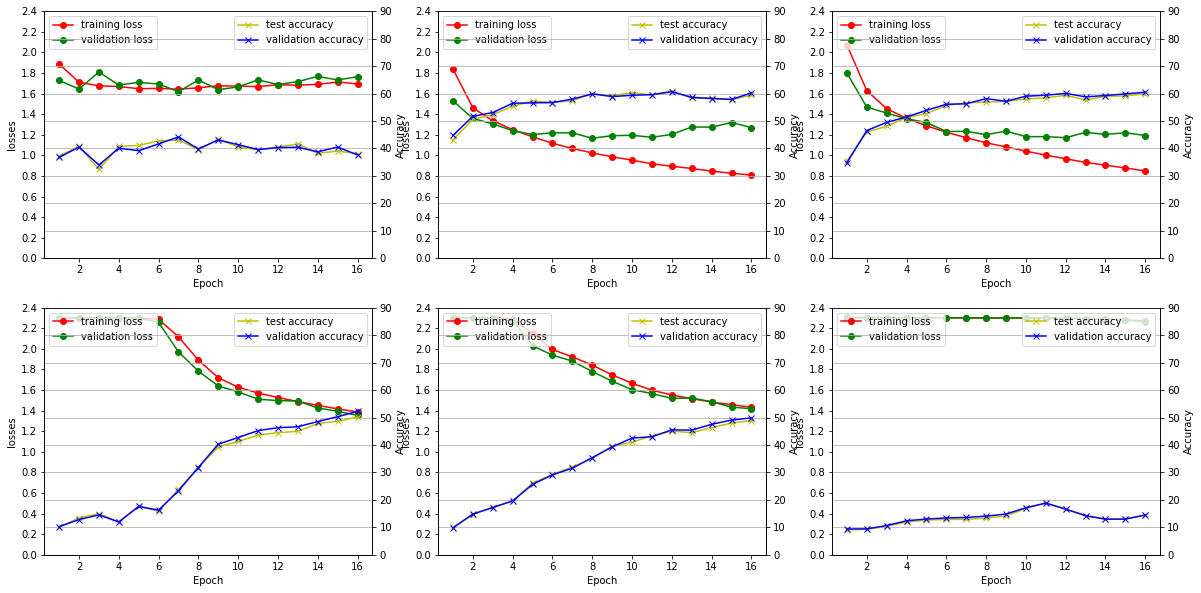

In [ ]:
plotting(bs4_training_loss_data, bs4_validation_loss_data, bs4_validation_accuracy, bs4_test_accuracy)

In [ ]:
# when batch size is 8
bs8_training_loss_data = []
bs8_validation_loss_data = []
bs8_validation_accuracy = []
bs8_test_accuracy = []
training(lrs, bs8_training_loss_data, bs8_validation_loss_data, bs8_validation_accuracy, bs8_test_accuracy)

epoch: 1, training loss: 1.857
epoch: 1, validation loss: 1.534
Accuracy of the network on the 5000 validation images: 43 %
Accuracy of the network on the 10000 test images: 44 %
epoch: 2, training loss: 1.496
epoch: 2, validation loss: 1.470
Accuracy of the network on the 5000 validation images: 46 %
Accuracy of the network on the 10000 test images: 47 %
epoch: 3, training loss: 1.406
epoch: 3, validation loss: 1.465
Accuracy of the network on the 5000 validation images: 47 %
Accuracy of the network on the 10000 test images: 47 %
epoch: 4, training loss: 1.350
epoch: 4, validation loss: 1.393
Accuracy of the network on the 5000 validation images: 51 %
Accuracy of the network on the 10000 test images: 51 %
epoch: 5, training loss: 1.309
epoch: 5, validation loss: 1.409
Accuracy of the network on the 5000 validation images: 51 %
Accuracy of the network on the 10000 test images: 51 %
epoch: 6, training loss: 1.278
epoch: 6, validation loss: 1.384
Accuracy of the network on the 5000 valid

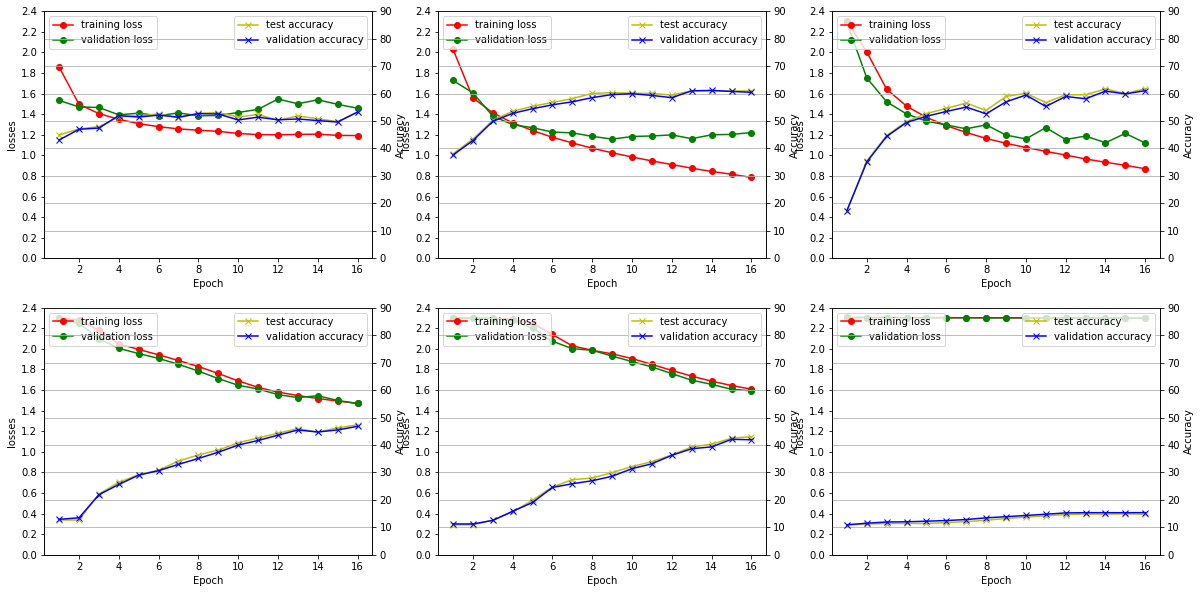

In [ ]:
plotting(bs8_training_loss_data, bs8_validation_loss_data, bs8_validation_accuracy, bs8_test_accuracy)

##### your analysis comes here:
-----
**1) What are the choices that could be empirically ignored without doing any experiments? Were you correct after you conduct the experiments?**

For the batch size values, 2 can be empirically ignored because Batch size is too small, time consuming and gradient oscillation is serious, which is not conducive to convergence. In the experiment, when the batch size is 2, the time consuming is large and accurcy is not satisfactory.

For the value of learning rate,0.005, 0.00001 and 0.00005 can be ignored,The initial learning rate must have an optimal value. If it is too large, the model will not converge; if it is too small, the model will converge very slowly or cannot be learned. In experiment, there is same situation.

For the value of epoch, 2 can be ignored because for the entire training procedure, twice of the full data set training is not enough.

**2) How many epochs are passed when the network is converged?**

According to the graph, the network is converged when epoch is equal to 8.

**3) Why too large or too small learning rates are not good choices?**

Because if the learning rate is too small, the optimization progress will take a longer time because the steps towards the minimum of the loss function are extremely small, the model will converge very slowly or cannot be learned.

If the learning rate is too large, the model will not converge and even diverge

**4) What are the specification of the computer you are using? E.g. the cpu/gpu type and the corresponding memory.**

CPU: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz

GPU: NVIDIA RTX 2060

RAM: 16.0 GB

**5) How long do you run an epoch? Did you use samples of the original dataset to speed up your progress, and how did it work?**

When the batch size is small (2), the time consuming is large, the batch size is large(8), it will be fast, the average time of each epoch takes around 59 seconds.

**6) Are there any overfitting problems?**

Yes, in the figures, when the epoch is over 8, especially 16, the overfitting problem occurs.

### Part 3: More options

Please indicate the **three** tasks you are assigned here:

1) Transformation: Affine+Resize

2) Structure: Activation method

3) Training procedure: lr scheduler: Exponential

For your new baseline and the test for different options, you need to write them in **ONE** single `.py` file. You can debug here, but do **NOT** include your codes in the submitted ipynb file. Your codes for this part will be put in the **project1.py** file.

**Question**: how do you define your new baseline and why? Please highlight the differences between your new baseline and the previous baseline.

##### your analysis comes here:
-----
1) My new base line has 3 Convolution layer，and each layer has pooling layer and activity function. The new baseline use more output channels, in first layer, the output channel is 32, second layer is 128 and third layer is 256(limitation). The number of feature map will be increase, the accurcy will be more.

2) The padding of new baseline turn to 1, that is different with the previous baseline. The convolution layer will be downsampleing, add padding can keep the image size.

3) The 3 different fully connected layer can improve the performance of network classification, more channels can improve the accrucy. In the new baseline, the first fc layer has 1024(limitaion) channels. 


_____

**Question**: how did you test the three tasks and what did you learn? Please use some figures, math equations and output from your codes to make analysis. 

##### your analysis comes here:
-----
I control different variable to test the network.

1) Transformation: My transformation function is resize and affine.

The affine function can translate the image in different ways to make the object appear at different positions of the image in different proportions, which can also reduce the sensitivity of the model to the target position. Affine can also adjust factors such as brightness, contrast, saturation and hue to reduce the sensitivity of the model to color. The risize function can turn the image to the large size, and the more data in each image, it is easier to analysis the feature of each image. I turn the size of image to 64x64, the accurcy from 40 turn to the 53.

2) Activation method: ReLU.

The input to each activation function is a number, and then some fixed mathematical operation is performed on it.Activation functions introduce nonlinear factors into neurons, and without activation functions, the output is a linear combination of inputs no matter how many layers there are in the neural network.

I test 3 different activity functions: sigmoid, tanh and Relu.
Sigmoid has two main disadvantage, Saturation of the Sigmoid function makes the gradient disappear and the output of the Sigmoid function is not zero-centric. When I use sigmoid, the change of loss is slowly and loss is still large when training finished. Tanh solves the problem of whether the output of Sigmoid is zero center, but there is still a saturation problem. So the change of loss is better than the sigmoid, but it still not have a good performance.Compared with sigmoid and TanH functions, ReLU has a huge acceleration effect on the convergence of stochastic gradient descent.The derivative of SIGmoid and Tanh involves exponential operation, while the derivative of ReLU hardly involves any calculation. The experiment performance for three activation function, ReLU has the best accurcy.

3)Training: lr scheduler: Exponential

If learning rate is too low, training will move slowly: we have made very little adjustment to the network's weight.However, if learning rate is seted too high, it may have undesirable consequences on your loss function. I set the gamma of exponential lr scheduler is 0.9, that means each epoch, the learning rate will reduce 10%, and 0.9 has the best performance. If the gamma is lower than 0.9, the learnning rate will be reduce too fast, and the accurcy of model with be reduced.
 


_____

### Reference
1. Author, Title, url
2. Ashima_Garg，https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987/2
3. 

### Specs:
e.g. Your cpu version or GPU version, the memory size of your computer. Your pytorch software versions.